# Исследование надёжности заёмщиков
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Результаты исследования будут учтены при построении модели кредитного скоринга.

*Цель исследования* — ответить на вопросы:

1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

*Ход исследования*

Входные данные от банка — статистика о платёжеспособности клиентов — получены из файла data.csv. О качестве данных ничего не известно. Поэтому перед тем, как отвечать на вопрсоы исследования и делать вывод, понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки, поищем возможность исправить самые критичные ошибки данных.

После ответа на поставленные в исследовании вопросы, сделаем общией вывод.

Таким образом, исследование пройдёт в четыре этапа:

1. Обзор данных
2. Предобработка данных
3. Ответы на вопросы исследования
4. Общий вывод

## Обзор данных

In [19]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None

In [20]:
# Читаем файл и получаем основные данные dataset
df = pd.read_csv('./data/s2_data.csv')

print(df.shape)
print()
print(df.dtypes)
print()
print(df.info())

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(21525, 12)

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt 

## Предобработка данных
### Удаление пропусков

In [21]:
# Выведем количество пропущенных значений для каждого столбца
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Столбец с пропущенными значениями — total_income — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type.

<Axes: >

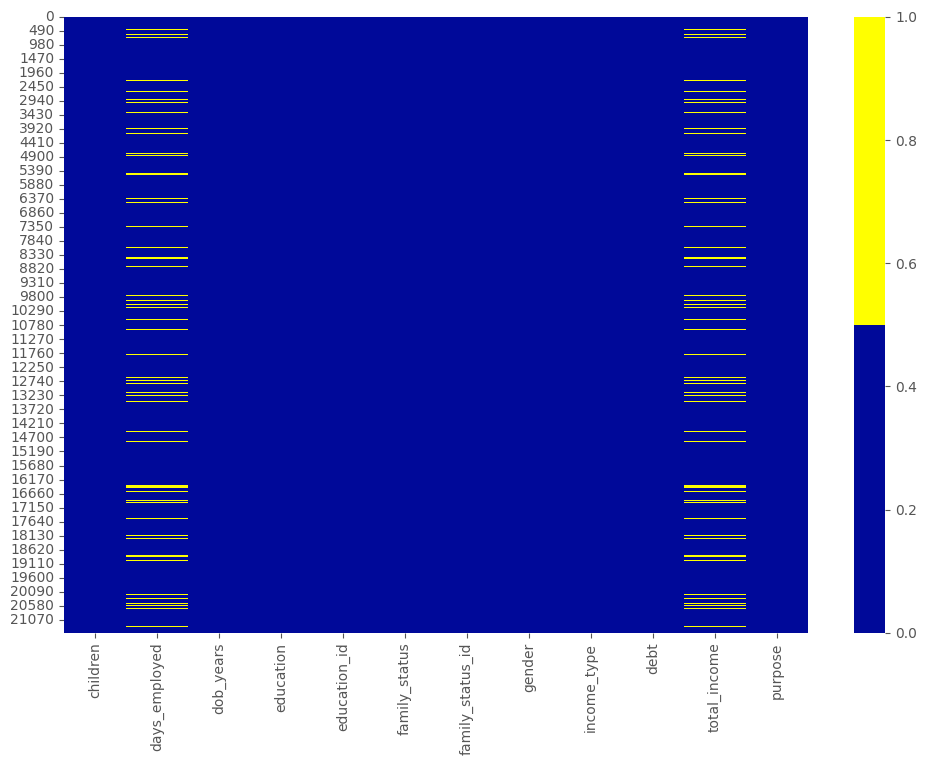

In [22]:
cols = df.columns[:30]
colours = ['#000999', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [23]:
for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_values*100)))

children - 0%
days_employed - 10%
dob_years - 0%
education - 0%
education_id - 0%
family_status - 0%
family_status_id - 0%
gender - 0%
income_type - 0%
debt - 0%
total_income - 10%
purpose - 0%


В колонке `total_income` есть отсутствующие значения. Заполним их медианными значениями.

In [24]:
med = df['total_income'].median()
df['total_income'] = df['total_income'].fillna(med)

In [25]:
income_type_list = list(df['income_type'].value_counts().index)
income_type_list

['сотрудник',
 'компаньон',
 'пенсионер',
 'госслужащий',
 'безработный',
 'предприниматель',
 'студент',
 'в декрете']

In [26]:
for val in income_type_list:
    res_median = df[df['income_type'] == val]['total_income'].median()
    display(res_median)

145017.93753253992

162401.35155456822

128747.67556966442

145017.93753253992

131339.7516762103

322090.5412398128

98201.62531401133

53829.13072905995

In [27]:
for val in income_type_list:
    res_median = df[df['income_type'] == val]['total_income'].median()
    df[df['income_type'] == val]['total_income'].fillna(res_median, inplace=True)
    print(df['income_type'].isnull().sum())

0
0
0
0
0
0
0
0


In [28]:
dob_years_list = list(df['dob_years'].value_counts().index)
dob_years_list

[35,
 40,
 41,
 34,
 38,
 42,
 33,
 39,
 31,
 36,
 44,
 29,
 30,
 48,
 37,
 50,
 43,
 32,
 49,
 28,
 45,
 27,
 56,
 52,
 47,
 54,
 46,
 58,
 57,
 53,
 51,
 59,
 55,
 26,
 60,
 25,
 61,
 62,
 63,
 64,
 24,
 23,
 65,
 22,
 66,
 67,
 21,
 0,
 68,
 69,
 70,
 71,
 20,
 72,
 19,
 73,
 74,
 75]

In [29]:
dob_years_list = df['dob_years'].value_counts()
dob_years_list

dob_years
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: count, dtype: int64

In [30]:
df_deduplicated = df.drop_duplicates()

print(df_deduplicated.shape)
print(df_deduplicated)

(21471, 12)
       children  days_employed  dob_years education  education_id  \
0             1   -8437.673028         42    высшее             0   
1             1   -4024.803754         36   среднее             1   
2             0   -5623.422610         33   Среднее             1   
3             3   -4124.747207         32   среднее             1   
4             0  340266.072047         53   среднее             1   
...         ...            ...        ...       ...           ...   
21520         1   -4529.316663         43   среднее             1   
21521         0  343937.404131         67   среднее             1   
21522         1   -2113.346888         38   среднее             1   
21523         3   -3112.481705         38   среднее             1   
21524         2   -1984.507589         40   среднее             1   

          family_status  family_status_id gender income_type  debt  \
0       женат / замужем                 0      F   сотрудник     0   
1       женат / зам

## Обработка аномальных значений
Обработаем пропуски в столбце days_employed. Отрицательное количество дней трудового стажа - это аномалия. Заменим все отрицательные значения положительными.

In [31]:
# возьмем модуль значений с помощью abs()
df['days_employed'] = df['days_employed'].abs()

In [32]:
# выведем медианное значение трудового стажа в днях
df.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится для исследования.

*Выведем перечень уникальных значений столбца children*

In [33]:
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма data.

In [37]:
# удаляем
df = df[(df['children'] != -1) & (df['children'] != 20)]

In [38]:
# проверяем
df['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

*Заполним пропуски в столбце days_employed медианными значениями по каждого типа занятости income_type.*

In [39]:
for t in df['income_type'].unique():
    df.loc[(df['income_type'] == t) & (df['days_employed'].isna()), 'days_employed'] = \
    df.loc[(df['income_type'] == t), 'days_employed'].median()

In [40]:
# убедимся, что все пропуски заполнены
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [41]:
# меняем вещественные значения на целочисленные
df['total_income'] = df['total_income'].astype(int)

### Обработка дубликатов

In [42]:
# приводим к нижнему регистру столбец education
df['education'] = df['education'].str.lower()

In [43]:
# вывод кол-ва строк дубликатов
df.duplicated().sum()

71

In [44]:
# удалим дубликаты
df = df.drop_duplicates()

### Категоризация данных
Создадим столбец `total_income_category` с категориями:

* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

In [45]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [46]:
df['total_income_category'] = df['total_income'].apply(categorize_income)

*Выведем перечень уникальных целей взятия кредита*

In [47]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Сформирует новый столбец purpose_category, в который войдут следующие категории:

* 'операции с автомобилем',
* 'операции с недвижимостью',
* 'проведение свадьбы',
* 'получение образования'.

In [48]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [49]:
df['purpose_category'] = df['purpose'].apply(categorize_purpose)

### Исследование данных и ответы на вопросы

Для наглядности работы со столбцами отобразим их название

* *children* — количество детей в семье
* *days_employed* — общий трудовой стаж в днях
* *dob_years* — возраст клиента в годах
* *education* — уровень образования клиента
* *education_id* — идентификатор уровня образования
* *family_status* — семейное положение
* *family_status_id* — идентификатор семейного положения
* *gender* — пол клиента
* *income_type* — тип занятости
* *debt* — имел ли задолженность по возврату кредитов
* *total_income* — ежемесячный доход
* *purpose* — цель получения кредита

*Чтобы ответить на поставленные вопросы сделаем некоторые преобразования*

In [50]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


*Вывод: В столбце days_employed (общий трудовой стаж в днях) - вещественные значения. Должны быть целочисленные. Проверим и исправим этот недочет.*

In [52]:
df.info() # методом info проверим тип переменных в колонках

<class 'pandas.core.frame.DataFrame'>
Index: 21331 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21331 non-null  int64  
 1   days_employed          21331 non-null  float64
 2   dob_years              21331 non-null  int64  
 3   education              21331 non-null  object 
 4   education_id           21331 non-null  int64  
 5   family_status          21331 non-null  object 
 6   family_status_id       21331 non-null  int64  
 7   gender                 21331 non-null  object 
 8   income_type            21331 non-null  object 
 9   debt                   21331 non-null  int64  
 10  total_income           21331 non-null  int32  
 11  purpose                21331 non-null  object 
 12  total_income_category  21331 non-null  object 
 13  purpose_category       21331 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(7)
memory usage: 

In [53]:
df['days_employed'] = df['days_employed'].astype(int) # с помощью метода astype() преобразуем данные к типу int
df.head() # проверка

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


*Вывод: Можно заметить, что в столбце days_employed присутствуют аномально большие значения. Посмотрим на эти значения.*

*Также посмотрим как обстоят дела с аномалиями в других столбцах*

In [54]:
# вывод показателей
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,2.133100e+04
mean,0.474005,67148.470864,43.277952,0.816980,0.974497,0.081196,1.652494e+05
std,0.752378,139281.136753,12.575300,0.549282,1.421787,0.273143,9.814797e+04
min,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,1024.000000,33.000000,1.000000,0.000000,0.000000,1.075070e+05
50%,0.000000,1996.000000,42.000000,1.000000,0.000000,0.000000,1.450170e+05
75%,1.000000,5337.000000,53.000000,1.000000,1.000000,0.000000,1.958315e+05
max,5.000000,401755.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Вывод:

*Столбец children*

Ошибок нет. Отрицательных значений нет. Минимальное количество детей - 0. Максимальное - 5.

*Столбец days_employed*

Отрицательных значений нет. Минимальное значение - 24 дня. Максимальное значение 401755 стажа - аномально. Допустим, что это значение в часах, тогда получим около 16740 дней стажа(что соответствует примерно 46 годам стажа). Учитывая, что максимальный возраст клиента 75 лет, предположение, что аномальные значения приведены в часах считаю верным. Приведем все аномальные значения в столбце к значениям в днях. Т.к. миниальный возраст для оформления по трудовому договору - 16 лет, а максимальное значение возраста - 75 лет. Возьмем границу стажа равную 59 лет (округлив получим 21500 дней). Все значения выше будем считать ошибочными и разделим их на 24 часа, приведя к дням.

*Столбец dob_years*

Минимальное значение возраста в годах 0 - т.е. клиенту нет года. Аномалия!

*Столбец total_income*

Максимальное значение достаточно большое, но аномальных значений нет.

In [56]:
# Приводим аномальные значения в столбце days_employed к значениям в днях
df.loc[df['days_employed'] > 21500, 'days_employed'] = df.loc[df['days_employed'] > 21500, 'days_employed'] / 24

In [57]:
# Проверим
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.00,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.00,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.00,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.00,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,14177.75,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.00,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.00,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.00,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.00,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.00,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


In [58]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,2.133100e+04
mean,0.474005,4596.602298,43.277952,0.816980,0.974497,0.081196,1.652494e+05
std,0.752378,5350.914876,12.575300,0.549282,1.421787,0.273143,9.814797e+04
min,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,1024.000000,33.000000,1.000000,0.000000,0.000000,1.075070e+05
50%,0.000000,1996.000000,42.000000,1.000000,0.000000,0.000000,1.450170e+05
75%,1.000000,5337.000000,53.000000,1.000000,1.000000,0.000000,1.958315e+05
max,5.000000,18388.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


*Вывод: Максимальное значение в столбце days_employed равно 18388 дней, что соответствует 50 годам стажа.*

*Но у нас снова значения в столбце стали вещественными, т.к. мы применяли деление. (при делении целых чисел мы получим float). Преобразуем значения еще раз в целочисленные.*

In [59]:
df['days_employed'] = df['days_employed'].astype(int) # с помощью метода astype() преобразуем данные к типу int
df.head() # проверка

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


*Столбец dob_years*

In [60]:
# Посмотрим количество строк в датафрейме, где возраст меньше 18 лет(минимальны возраст заёмщика)
df.loc[df['dob_years'] < 18, 'dob_years'].count()

100

In [61]:
# Посмотрим, являются строки с возрастом менее 18 лет - нулём. Для этого посчитаем кол-во строк меньше 18 лет и не равных 0.
df.loc[(df['dob_years'] < 18) & (df['dob_years'] != 0), 'dob_years'].count()

0

*Вывод: Значение 0 говорит, что 100 строк содежат возраст заёмщика равный 0, что является ошибкой в данных. Вероятно, ошибка могла произойти вследствие заполнения нулями отсутствующих значений. Обработаем их как пропуски. Заменим, нулевые значения средними, которые посчитаем для каждого типа занятости(income_type).*

In [62]:
# Пройдемся циклом for по уникальным значениям колонки тип занятости
# Найдем среднее значение
# Заполним пропуски полученными значениями
for t in df['income_type'].unique():
    mean_value = df.loc[df['income_type'] == t, 'dob_years'].mean()
    df.loc[(df['dob_years'] == 0) & (df['income_type'] == t), 'dob_years'] = mean_value

C:\Users\Pro\AppData\Local\Temp\ipykernel_15904\1906518784.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '39.8098955969133' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['dob_years'] == 0) & (df['income_type'] == t), 'dob_years'] = mean_value


In [63]:
df.loc[df['dob_years'] == 0, 'dob_years'].count()

0

*Вывод: Нулевые значения в колонке* dob_years *заменили средними по типу занятости.*

*Столбец education*

In [64]:
# Смотрим на значения столбца education
df['education'].sort_values().value_counts()

education
среднее                15075
высшее                  5227
неоконченное высшее      741
начальное                282
ученая степень             6
Name: count, dtype: int64

*Вывод: данные впорядке*

*Столбец gender*

In [65]:
# смотрим значения
df['gender'].sort_values().value_counts()

gender
F      14092
M       7238
XNA        1
Name: count, dtype: int64

*Вывод: В столбце gender есть 1 некорректное значение*

In [66]:
# Посмотрим на строку с некорректным значением в столбце gender
df.loc[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
10701,0,2358,24.0,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости,B,операции с недвижимостью


*Вывод: определить пол не представляется возможным. Т.к. столбец gender для исследований нам не понадобится. Оставим это значение как есть, чтобы не нарушать данные.*

### Ответы на вопросы
3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для ответа на этот вопрос сделаем следующее:

Cоздадим дополнительный столбец в датафрейме, в котором сделаем категоризацию по кол-ву детей.

Cоздадим сводную таблицу.

*Создадим функцию, которая будет выводить категорию людей по количеству детей:*

* *нет детей*, если детей нет
* *есть дети*, если 1 или 2 ребенка
* *многодетный*, если 3 и более детей

In [67]:
# Функция категоризации по детям
def children_category(children):
    if 1 <= children <= 2:
        return 'есть дети'
    if children >= 3:
        return 'многодетный'
    return 'нет детей'

In [68]:
# Создаем столбец children_rank
df['children_rank'] = df['children'].apply(children_category)

In [69]:
# Проверяем результат. Выведем последние 5 значений
df.tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,children_rank
21520,1,4529,43.0,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью,есть дети
21521,0,14330,67.0,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем,нет детей
21522,1,2113,38.0,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью,есть дети
21523,3,3112,38.0,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем,многодетный
21524,2,1984,40.0,среднее,1,женат / замужем,0,F,сотрудник,0,82047,на покупку автомобиля,C,операции с автомобилем,есть дети


*Создадим сводную таблицу*

In [70]:
# Создаем таблицу методом pivot_table()
debt_children = df.pivot_table(index='children_rank', columns='debt', values='gender', aggfunc='count')
# Создаем столбцы
debt_children.columns = ['no_debt', 'debt']
# Считаем долю должников
debt_children['share_of_debtors'] = debt_children['debt'] / (debt_children['debt'] + debt_children['no_debt'])
# Переводим значения в столбце доля дожников в проценты
debt_children['share_of_debtors'] = debt_children['share_of_debtors'].map('{:.1%}'.format)
# Сортируем по столбцу доля лолжников по убыванию
debt_children.sort_values(by='share_of_debtors', ascending=False)

,no_debt,debt,share_of_debtors
children_rank,,,
есть дети,6222,638,9.3%
многодетный,349,31,8.2%
нет детей,13028,1063,7.5%


*Вывод: Наличие детей повышает вероятность задолжености.* Вероятно, это связано с дополнительными расходами на детей. Однако, можно заметить, что в многодетных семьях уровень должников ниже (8.2%), чем в семьях с одним или двумя детьми (9.3%). Это может быть связано либо с тем, что существуют программы поддержки многодетных семей или количество заемщиков в категории "многодетный" для данного сравнения недостаточно. Для категории граждан без детей самый низкий показатель должников (7.3%).

3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

*Создадим сводную таблицу*

In [ ]:
# Создаем таблицу методом pivot_table()
debt_family_status = df.pivot_table(index='family_status', columns='debt', values='gender', aggfunc='count')
# Создаем столбцы
debt_family_status.columns = ['no_debt', 'debt']
# Считаем долю должников
debt_family_status['share_of_debtors'] = debt_family_status['debt'] / (debt_family_status['debt'] + debt_family_status['no_debt'])
# Переводим значения в столбце доля дожников в проценты
debt_family_status['share_of_debtors'] = debt_family_status['share_of_debtors'].map('{:.1%}'.format)
# Сортируем по столбцу доля лолжников по убыванию
debt_family_status.sort_values(by='share_of_debtors', ascending=False)

Вывод: *Холостые и живущие в граждансокм браке пары больше подвержены риску стать должниками.* Вероятно, это связано с тем, что у них больше свободы действий по распоряжению своими средствами. У них нет совместных накоплений, каждый распоряжается своими средствами по своему. Остальные категории, побывавшие в браке или на текущей момент в браке имеют меньшие проценты должников. Наиболее низкий процент у категории вдовец/вдова (6.6%). Это может быть связано с дополнительными средствами, доставшимися по наследству.

3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

*Запишем для наглядности категоризацию по уровню дохода, которую ранее упоминали в проекте.*

* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

*Создадим сводную таблицу*

In [71]:
# Создаем таблицу методом pivot()
debt_total_income = df.pivot_table(index='total_income_category', columns='debt', values='gender', aggfunc='count')
# Создаем столбцы
debt_total_income.columns = ['no_debt', 'debt']
# Считаем долю должников
debt_total_income['share_of_debtors'] = debt_total_income['debt'] / (debt_total_income['debt'] + debt_total_income['no_debt'])
# Переводим значения в столбце доля дожников в проценты
debt_total_income['share_of_debtors'] = debt_total_income['share_of_debtors'].map('{:.1%}'.format)
# Сортируем по столбцу доля лолжников по убыванию
debt_total_income.sort_values(by='share_of_debtors', ascending=False)

,no_debt,debt,share_of_debtors
total_income_category,,,
E,20,2,9.1%
C,14569,1353,8.5%
A,23,2,8.0%
B,4659,354,7.1%
D,328,21,6.0%


*Вывод: Категория граждан (С) со средним доходом (50001–200000) больше подвержены риску стать должниками.* Несмотря на то, что в итоговой таблицы должников данная категория граждан имеет не самый высокий процент по должникам, для точного исследования мы должны рассматривать репрезентативные выборки(категории граждан). Соответственно категории "E" и "A" мы не берем в расчет (из-за маленькой выборки), а выводы делаем опираясь на категории C, B, D. Сравнивая эти категории делаем вывод, что наибольший риск стать должниками у категории C, а наименьший у категории D.

3.4 Как разные цели кредита влияют на его возврат в срок?

*Создадим сводную таблицу*

In [72]:
# Создаем таблицу методом pivot_table()
debt_purpose_category = df.pivot_table(index='purpose_category', columns='debt', values='gender', aggfunc='count')
# Создаем столбцы
debt_purpose_category.columns = ['no_debt', 'debt']
# Считаем долю должников
debt_purpose_category['share_of_debtors'] = debt_purpose_category['debt'] / (debt_purpose_category['debt'] + debt_purpose_category['no_debt'])
# Переводим значения в столбце доля дожников в проценты
debt_purpose_category['share_of_debtors'] = debt_purpose_category['share_of_debtors'].map('{:.1%}'.format)
# Сортируем по столбцу доля лолжников по убыванию
debt_purpose_category.sort_values(by='share_of_debtors', ascending=False)

,no_debt,debt,share_of_debtors
purpose_category,,,
операции с автомобилем,3879,400,9.3%
получение образования,3619,369,9.3%
проведение свадьбы,2130,183,7.9%
операции с недвижимостью,9971,780,7.3%


Вывод: *Граждане, берущие кредиты на получение образования и операции с автомобилем больше подвержены риску стать должниками.* Эти две категории имеют одинаковый процент должников (9.3%). Граждане, которые берут кредит для проведения операций с недвижимостью более отвественно подходят к его погашению.

3.5 Приведите возможные причины появления пропусков в исходных данных.

Ответ: Причинами могут быть: неверный ввод данных, сокрытие информации, повреждение файла данных при сохранении, технические проблемы.

3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Ответ: Возможно потому что медиана устойчива к выбросам и аномальным значениям.

Общий вывод.
* Наличие детей повышает вероятность задолжености.
* Холостые и живущие в граждансокм браке пары больше подвержены риску стать должниками.
* Категория граждан со средним доходом (50001–200000) больше подвержены риску стать должниками.
* Граждане, берущие кредиты на получение образования и операции с автомобилем больше подвержены риску стать должниками.
* Причинами появления пропусков в данных могут быть: неверный ввод данных, сокрытие информации, повреждение файла данных при сохранении, технические проблемы.
* Заполнение пропусков для количественных переменных медианой является лучшим решением из-за устойчивости медианы к выбросам и аномальным значениям.